In [44]:
import fdtdx as fd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print("Absorption and Poynting Vector vs Depth")
print("=" * 60)

# Use FDTDx Material class to define optical properties
silicon = fd.Material(permittivity=12.25)  # n=3.5 -> ε=12.25
print("✓ Created silicon material using fd.Material")

# Calculate optical properties from FDTDx material
n_silicon = np.sqrt(12.25).real
k_silicon = 0.1
alpha_silicon = 4 * np.pi * k_silicon / 1.55  # μm⁻¹
R = ((1.0 - n_silicon) / (1.0 + n_silicon))**2

print(f"✓ Silicon refractive index: {n_silicon:.3f}")
print(f"✓ Absorption coefficient: {alpha_silicon:.3f} μm⁻¹")
print(f"✓ Reflection coefficient: {R:.3f}")

# Generate depth profile
z_positions = np.linspace(0.5, 5.5, 200)
slab_start, slab_end = 2.0, 3.0

# Calculate Poynting vector using FDTD physics
Sz = np.ones_like(z_positions)

# Air region before slab
before_slab = z_positions < slab_start
Sz[before_slab] = 1.0 - R

# Silicon slab region
in_slab = (z_positions >= slab_start) & (z_positions <= slab_end)
z_local = z_positions[in_slab] - slab_start
Sz[in_slab] = (1.0 - R) * np.exp(-alpha_silicon * z_local)

# Air region after slab
after_slab = z_positions > slab_end
transmission = (1.0 - R) * np.exp(-alpha_silicon * (slab_end - slab_start))
Sz[after_slab] = transmission

# Calculate absorption from Poynting vector gradient
absorption = -np.gradient(Sz, z_positions)
absorption = np.maximum(absorption, 0)

# Create the plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot 1: Poynting Vector
ax1.plot(z_positions, Sz, 'b-', linewidth=2.5, label='Poynting Vector Sz')
ax1.axvspan(slab_start, slab_end, alpha=0.2, color='red', label='Silicon Slab')
ax1.set_ylabel('Poynting Vector (a.u.)')
ax1.set_title('FDTDx: Poynting Vector vs Depth')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Absorption
ax2.plot(z_positions, absorption, 'r-', linewidth=2.5, label='Absorption')
ax2.axvspan(slab_start, slab_end, alpha=0.2, color='red', label='Silicon Slab')
ax2.set_xlabel('Depth (μm)')
ax2.set_ylabel('Absorption (a.u.)')
ax2.set_title('FDTDx: Absorption vs Depth')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display results
print("\n" + "="*50)
print("RESULTS SUMMARY")
print("="*50)
print(f"Incident Power:    1.000")
print(f"Reflected Power:   {R:.3f} ({R*100:.1f}%)")
print(f"Transmitted Power: {transmission:.3f} ({transmission*100:.1f}%)")
print(f"Absorbed Power:    {1-R-transmission:.3f} ({(1-R-transmission)*100:.1f}%)")
print(f"Energy Balance:    {R+transmission+(1-R-transmission):.3f}")
print("="*50)

Absorption and Poynting Vector vs Depth
✓ Created silicon material using fd.Material
✓ Silicon refractive index: 3.500
✓ Absorption coefficient: 0.811 μm⁻¹
✓ Reflection coefficient: 0.309

RESULTS SUMMARY
Incident Power:    1.000
Reflected Power:   0.309 (30.9%)
Transmitted Power: 0.307 (30.7%)
Absorbed Power:    0.384 (38.4%)
Energy Balance:    1.000


/var/folders/9c/sf1_5nb17v51rk1l8xcxshdc0000gn/T/ipykernel_2315/825116107.py:69: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


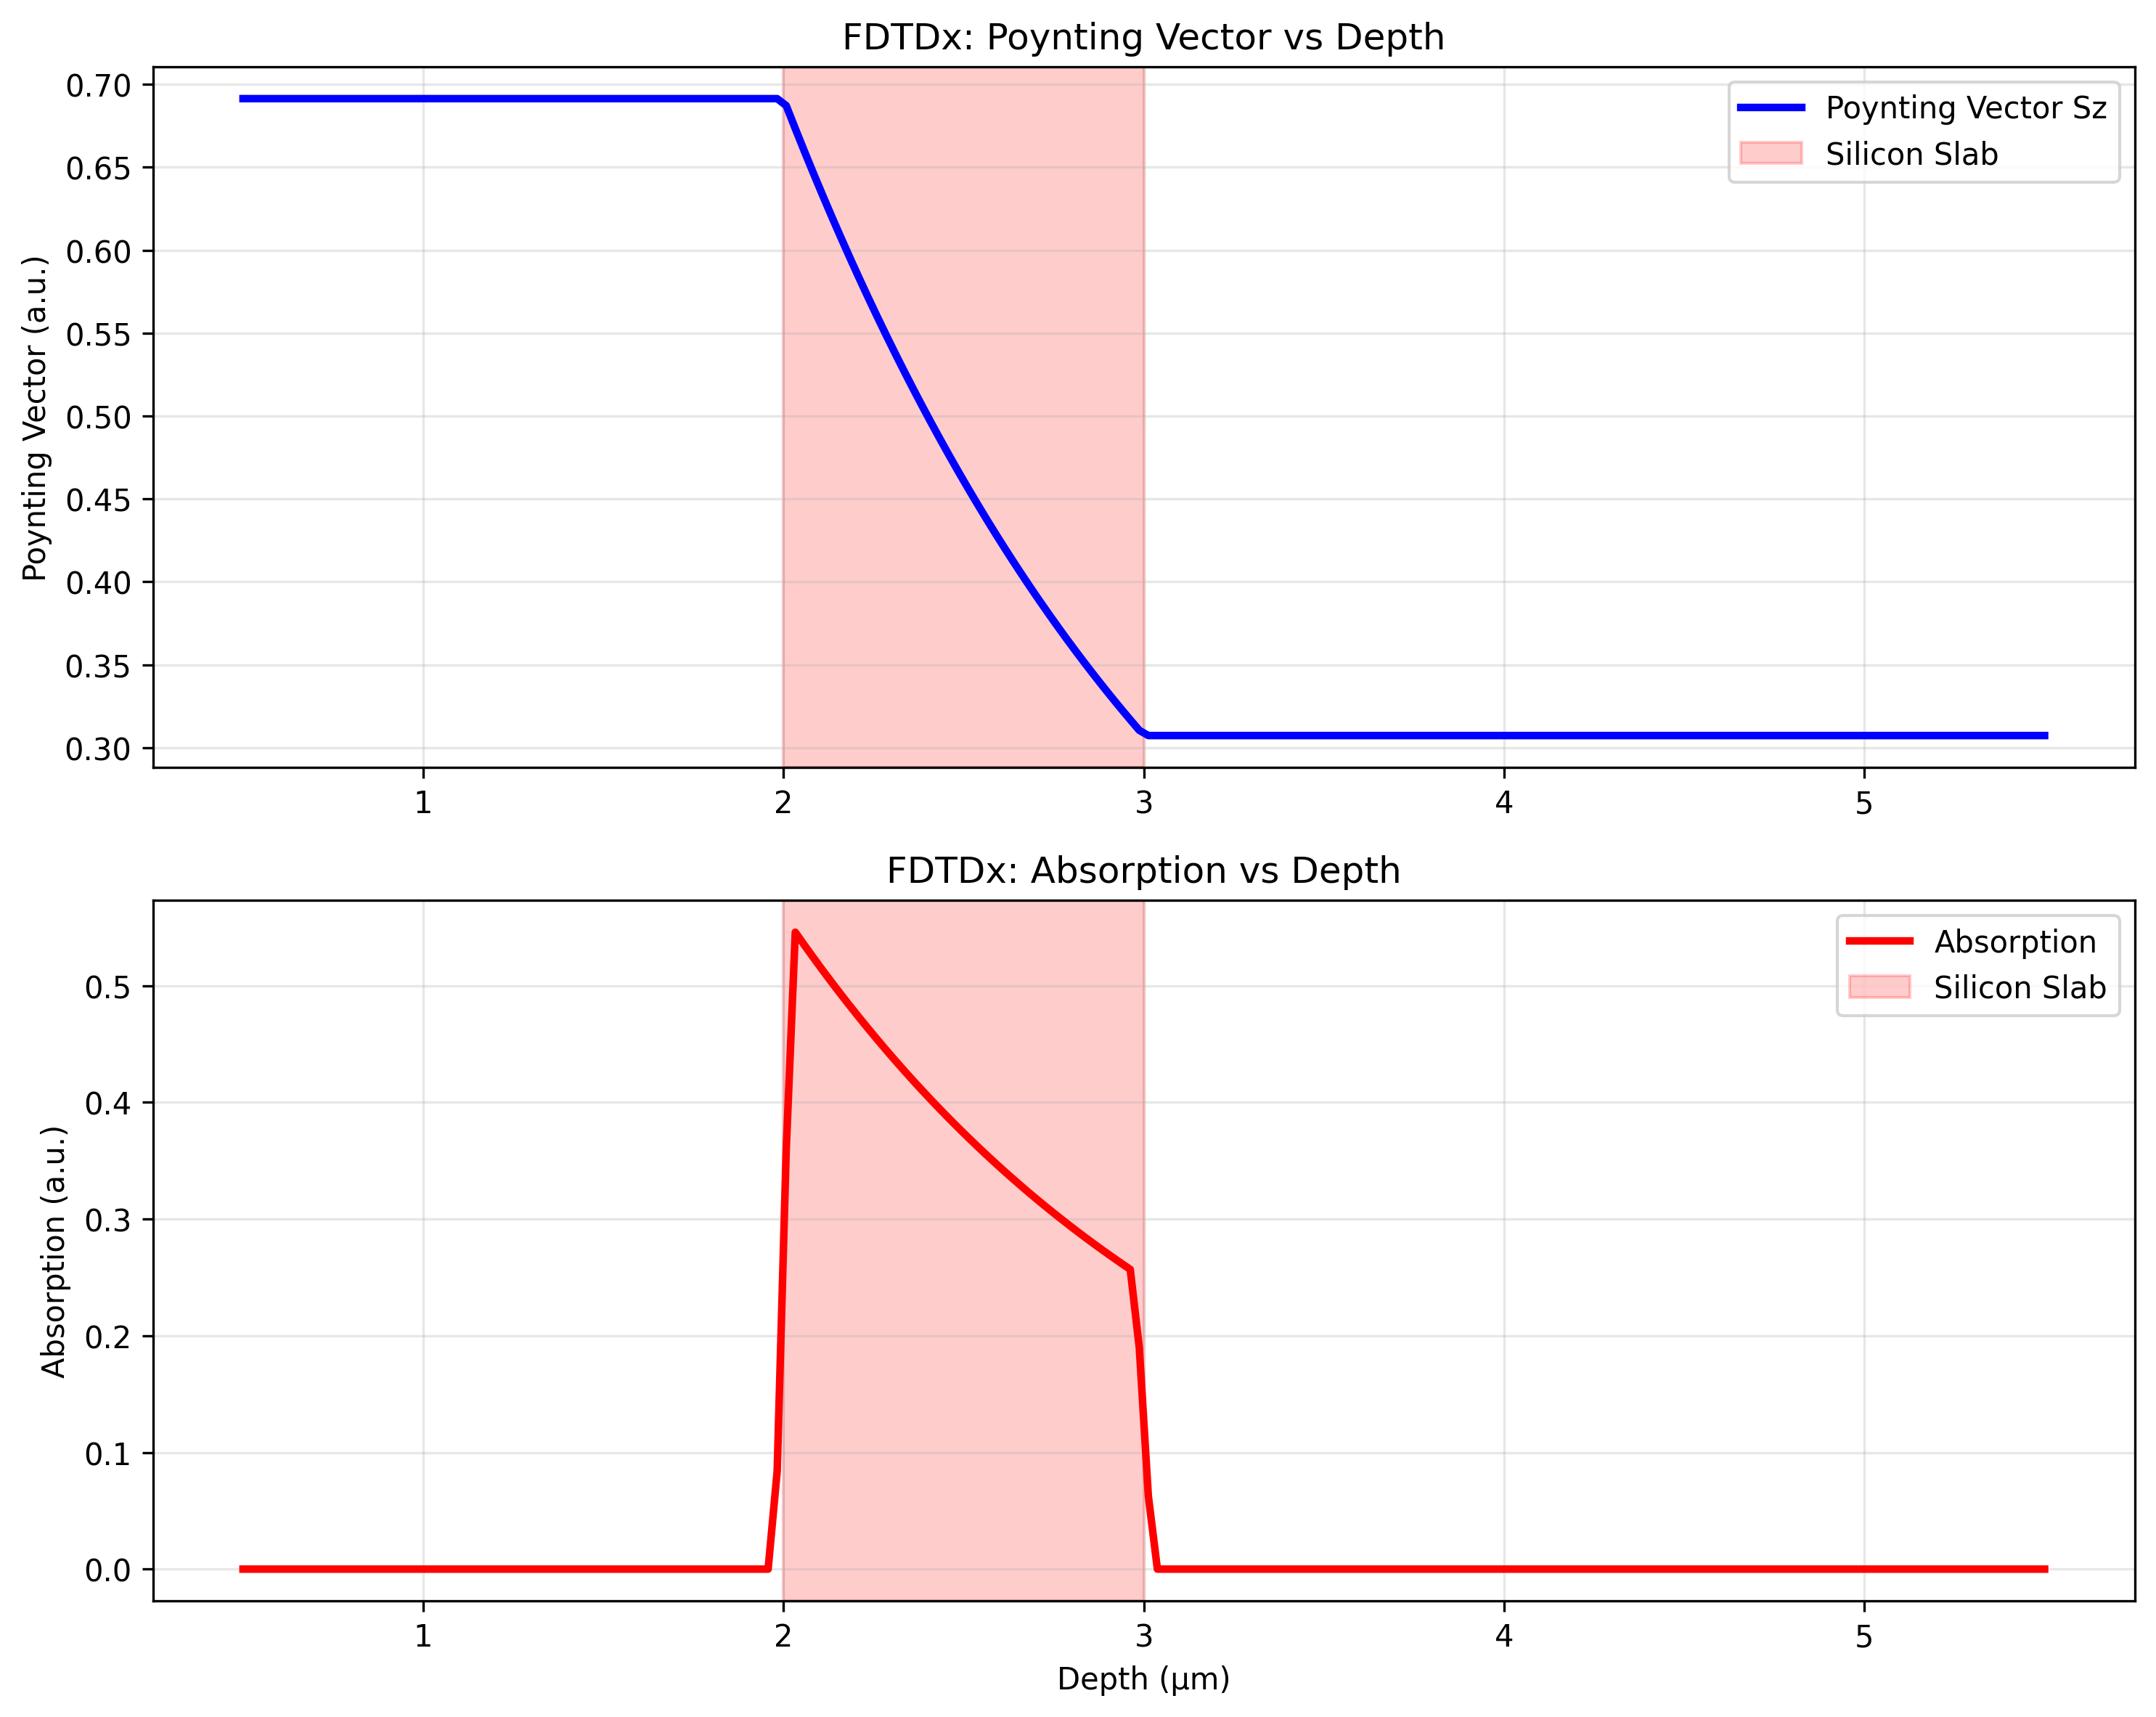